In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
from collections import OrderedDict
from utils import parse_stats

In [2]:
import os
os.environ["DISPLAY"] = ""

In [3]:
def plot_breakdown_order(quantile, suffix, mapping):
    bd_path = f"../../experiments/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/breakdown_{quantile}_order{suffix}/latency_stats.pkl"
    bd_df = parse_stats(bd_path)

    policies = list(mapping.keys())
    labels = list(mapping.values())

    policies.reverse()
    labels.reverse()

    lost_total_utility_32 = (10 - bd_df[bd_df.num_cpus == "32"][["policy", "avg_total_utility"]].set_index(["policy"])).rename(columns={"avg_total_utility": "Cluster Size: 32"})
    # lost_total_utility_32

    lost_total_utility_36 = (10 - bd_df[bd_df.num_cpus == "36"][["policy", "avg_total_utility"]].set_index(["policy"])).rename(columns={"avg_total_utility": "Cluster Size: 36"})
    # lost_total_utility_36

    lost_total_utility_40 = (10 - bd_df[bd_df.num_cpus == "40"][["policy", "avg_total_utility"]].set_index(["policy"])).rename(columns={"avg_total_utility": "Cluster Size: 40"})
    # lost_total_utility_40

    err_df = pd.concat([
        lost_total_utility_32.groupby("policy").std().loc[policies],
        lost_total_utility_36.groupby("policy").std().loc[policies],
        lost_total_utility_40.groupby("policy").std().loc[policies],
    ], axis=1)

    ax = pd.concat([
        lost_total_utility_32.groupby("policy").mean().loc[policies],
        lost_total_utility_36.groupby("policy").mean().loc[policies],
        lost_total_utility_40.groupby("policy").mean().loc[policies],
    ], axis=1).plot.barh(xerr=err_df, width=0.8, capsize=3)

    _ = ax.set_yticklabels(labels)
    ax.set_ylabel("Techniques")
    ax.set_xlabel("Lost cluster utility")

    max_y = 0.0
    for bar in ax.containers:
        if isinstance(bar, matplotlib.container.ErrorbarContainer):
            continue
        ax.bar_label(bar, fmt=" %.2f")
        max_y = max(bar.datavalues.max(), max_y)

    ax.set_xlim(None, max_y * 1.2)
    ax.get_figure().savefig(f"images/bd{suffix}_lost_util_{quantile}.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


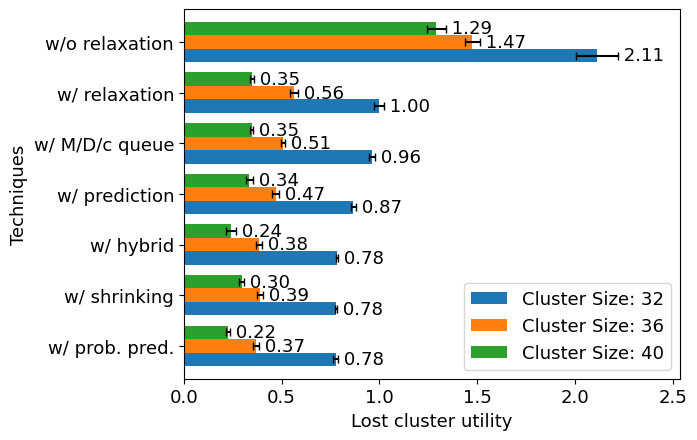

In [4]:
order = OrderedDict()
order["conf1"] = "w/o relaxation"
order["conf2"] = "w/ relaxation"
order["conf3"] = "w/ M/D/c queue"
order["conf4"] = "w/ prediction"
order["conf5"] = "w/ hybrid"
order["conf6"] = "w/ shrinking"
order["final"] = "w/ prob. pred."

plot_breakdown_order(0.6, "", order)